In [13]:
import os

import numpy as np
import torch
from torch.utils.data import DataLoader

# import Dataset from dataloader.py
from dataloader import VideoAudioDataset, get_random_segment

# !! Put data file location in file `data_filepath`
# If file `data_filepath` does not exist, assume data is located in root
filepath = 'vis-data-256/vis-data-256/'

if os.path.isfile('data_filepath'):
    with open('data_filepath', 'r') as f:
        filepath = f.readline() + filepath

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [14]:
print(filepath)

C:/Users/ysjan/Documents/data/Visually_Indicated_Sounds/vis-data-256/vis-data-256/


In [15]:
video_files = [filepath+i for i in os.listdir(filepath) if i.endswith('_mic.mp4')]
audio_files = [filepath+i for i in os.listdir(filepath) if i.endswith('_mic.wav')]
len(video_files), len(audio_files)

(977, 977)

In [16]:
dataset = VideoAudioDataset(video_files, audio_files)
dataset[0][0].shape, dataset[0][1].shape

((2203, 256, 456, 3), (7056648, 2))

In [17]:
# get a random segment of 5 seconds - keep the same time length for video and audio
dataset = VideoAudioDataset(video_files, audio_files, transform=get_random_segment)
dataset[0][0].shape, dataset[0][1].shape

((149, 256, 456, 3), (480000, 2))

In [18]:
# example of how to use the dataloader to iterate over the dataset
batch_size = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for i, (video, audio) in enumerate(dataloader):
    print(i, video.shape, audio.shape)
    if i == 0:
        break

0 torch.Size([4, 149, 256, 456, 3]) torch.Size([4, 480000, 2])


In [20]:
# For reproducibility
np.random.seed(1682090556)
torch.manual_seed(1682090556);

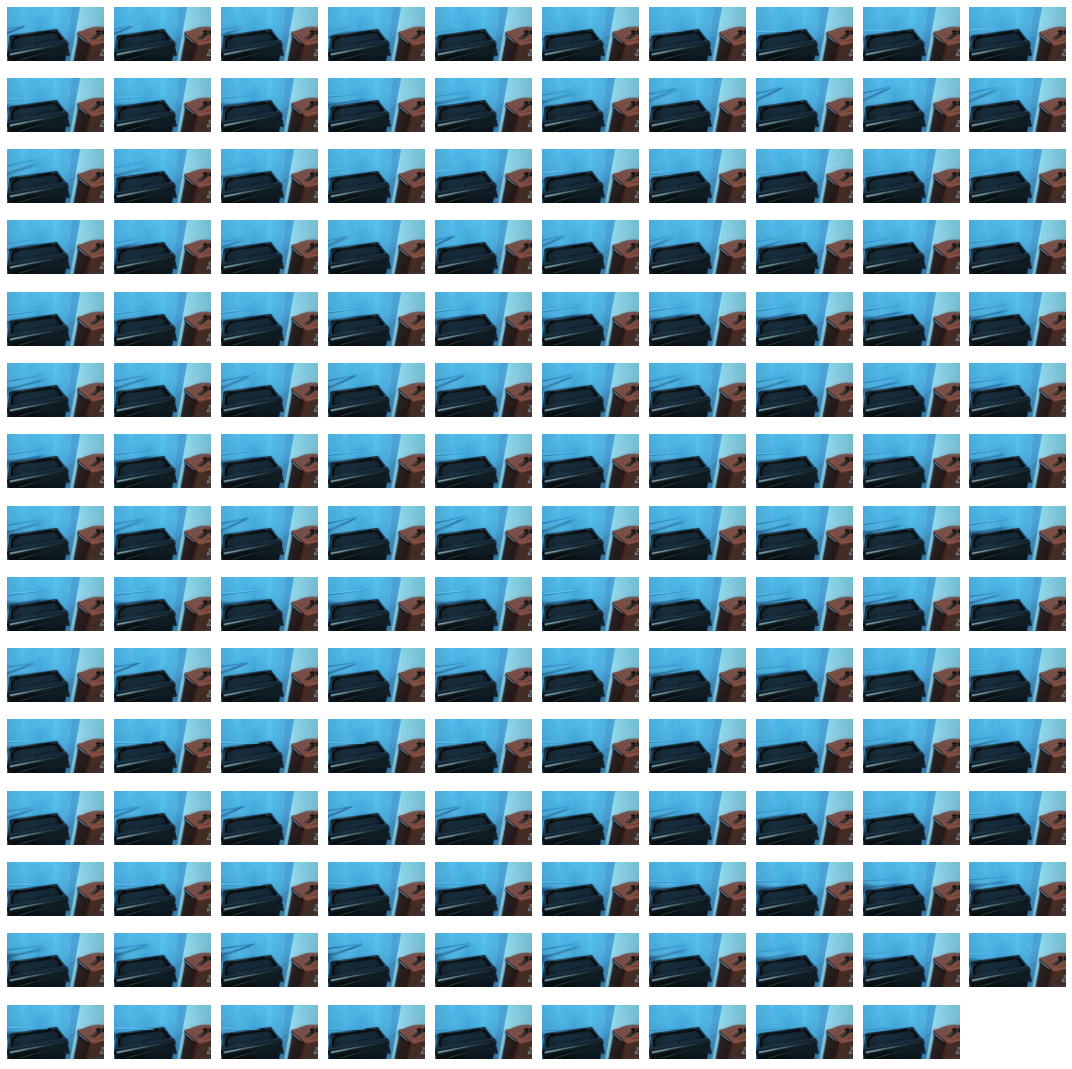

In [42]:
rnd_idx = np.random.randint(len(dataset))

video, audio = dataset[rnd_idx]

# display video

import matplotlib.pyplot as plt

n_col_display = 10

fig, ax = plt.subplots(video.shape[0]//n_col_display+1, n_col_display, figsize=(1.5*n_col_display, 15))

for i in range(video.shape[0]//n_col_display+1):
    for j in range(n_col_display):
        ax[i, j].axis('off')

fig.tight_layout()

for i in range(video.shape[0]):
    ax[i//n_col_display, i%n_col_display].imshow(video[i])
    
plt.show()